# Food Recommender

## Intro

Food recommendation system. 

Ever spent hours thinking about what to eat? Having trouble finding the perfect place to bring your friends/families out to eat? This food recommender shall be your best guide to finding your next favorite dining place!

Note: At the bottom is a guide to Recommendation Systems, matrix Factorisation etc. When you read, for any part that is confusing, do refer to the information at the bottom (if there is) for better understanding or search it up if you want. Thanks :D

### Import Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Collection

Scraper contributed by Nicholas. : ) We scraped all restaurants/stalls/hawkers in every road/street of Singapore on HungryGoWhere. Despite being automated, the process was arduous and time-consuming. This is because search results of HungryGoWhere are loaded dynamically, i.e. more posts appear as one scrolls down the page. As such, we took advantage of the Selenium library and its ability to automate scrolling. For most road/street with more than 400 restaurants/stalls/hawkers, scraping was incomplete/not carried out due to time and feasibility constraints. Before our food recommender can recommend users places not visited by them, it has to be able to predict user's ratings on those places. Hence, google reviews was also scraped.

In [2]:
# Food Project Web Scraper With Limit.ipynb
# Food Project Web Scraper.ipynb (GitHub)

In [3]:
# Data Merger.ipynb (GitHub)

### Import Dataset (Item Data)

List of all restaurants/stalls/hawkers scraped from HungryGoWhere with their respective information and google reviews (if present).

In [4]:
itemdata = pd.read_csv("Final_list.csv")
itemdata = itemdata.rename(columns = {'Unnamed: 0' : 'placeId'})
itemdata.head()

,placeId,Stall Name,Cuisine,Cuisine 1,Cuisine 2,Cuisine 3,Shop Type,Address,Google Address,Average Review,Number of Reviews
0,0,Fatty Cheong,[None],NaN,NaN,NaN,Kiosk or Stall,#01-144 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-120, Singapore 150006",4.2,153.0
1,1,Mani Iyer Mess,['South Indian'],South Indian,NaN,NaN,Restaurant,#01-01 Little India Conservation Area Hindoo R...,Hindoo Rd,4.3,435.0
2,2,Stall #01-46,"['Chinese', 'Snacks']",Chinese,Snacks,NaN,Kiosk or Stall,#01-46 Jalan Batu Food Centre Jalan Batu 432004,NaN,NaN,NaN
3,3,Wei Xiang Kitchen,"['Chinese', 'Seafood']",Chinese,Seafood,NaN,Kiosk or Stall,#01-106 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-106, Singapore 150006",5.0,1.0
4,4,The Thai Table,"['Asian', 'Indochinese', 'Thai']",Asian,Indochinese,Thai,Restaurant,Picardy Garden Jalan Pari Burong 488686,"20 Jln Pari Burong, Singapore 488686",4.2,34.0


In [5]:
itemdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20849 entries, 0 to 20848
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   placeId            20849 non-null  int64  
 1   Stall Name         20849 non-null  object 
 2   Cuisine            20849 non-null  object 
 3   Cuisine 1          20361 non-null  object 
 4   Cuisine 2          14094 non-null  object 
 5   Cuisine 3          7476 non-null   object 
 6   Shop Type          20849 non-null  object 
 7   Address            20849 non-null  object 
 8   Google Address     17941 non-null  object 
 9   Average Review     14794 non-null  float64
 10  Number of Reviews  14794 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.7+ MB


In [6]:
review = itemdata[['placeId', 'Average Review', 'Number of Reviews']]
print(review[['Average Review', 'Number of Reviews']].describe())

       Average Review  Number of Reviews
count    14794.000000       14794.000000
mean         3.994748         136.724280
std          0.633002         195.239541
min          1.000000           1.000000
25%          3.800000           9.000000
50%          4.100000          48.000000
75%          4.400000         186.000000
max          5.000000         998.000000


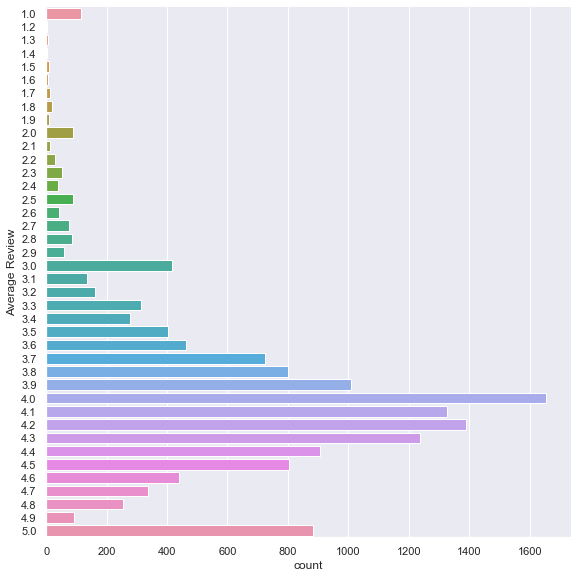

In [7]:
# Categorical plot without missing values
sb.catplot(y = 'Average Review', data = review, kind = "count", height = 8)

In [8]:
review['Average Review'] = review['Average Review'].round() 
review.head()

<ipython-input-8-b7353c8b47ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['Average Review'] = review['Average Review'].round()


,placeId,Average Review,Number of Reviews
0,0,4.0,153.0
1,1,4.0,435.0
2,2,NaN,NaN
3,3,5.0,1.0
4,4,4.0,34.0


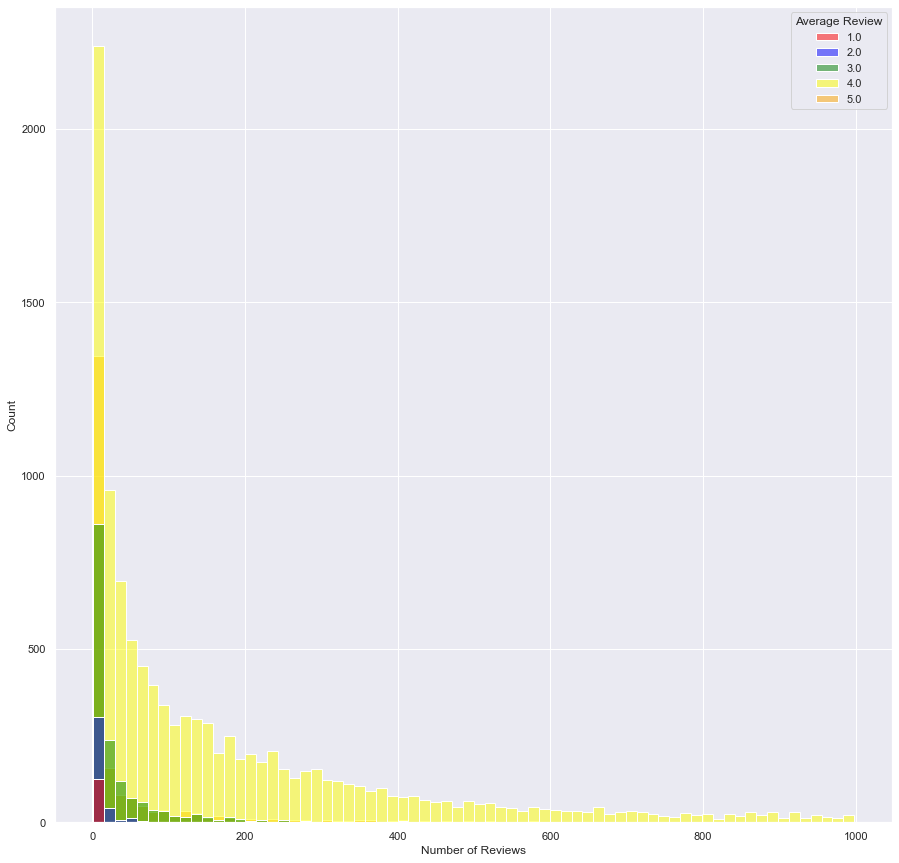

In [9]:
plt.figure(figsize = (15,15))
sb.histplot(data = review, x = "Number of Reviews", hue = 'Average Review', palette=["red", "blue", "green", "yellow", "orange"])

- **Standardisation**:

The result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively.

- **Max-Min Scaling**:

Another common approach is the so-called Min-Max scaling. This technique is to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1.

Note: Applying Max-Min scaling to datasets generates smaller standard deviations than using Standardisation method. It implies the data are more concentrated around the mean if we scale data using Max-Min scaling.

- **Normalization**:

sklearn.preprocessing.normalize(data,norm)

Normalization is the process of scaling individual samples to have unit norm. Norm is nothing but calculating the magnitude of the vector. In scaling, you’re changing the range of your data while in normalization you’re mostly changing the shape of the distribution of your data. You need to normalize our data if you’re going use a machine learning or statistics technique that assumes that data is normally distributed e.g. t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian Naive Bayes.

For more understanding: https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization

---

The following codes are not used due to change of plan. Just for information & understanding. 

---

## Stimulation

One issue that we encounted is users with multiple Google food reviews are few. If we solely base our predictions on user data collected from Google, it would be hard and inaccurate to predict user's ratings. To resolve our constraint in data available, we decided to stimulate our own users. 

### Generate Users

In [10]:
# User Characteristics Generator.ipynb

In [11]:
userdata = pd.read_csv("Users.csv")
userdata.head()

,userId,character,age,address,eatOut,drive,prRate,maxTravel
0,0,-0.45,23,Jurong East,0.64,1,0.91,32
1,1,-0.39,69,Bedok,0.76,1,0.40,24
2,2,0.04,37,Woodlands,0.50,1,0.86,30
3,3,-0.34,37,Geylang,0.64,1,0.61,29
4,4,-0.25,18,Jurong West,0.72,0,0.72,54


Description of dataframe:
- **UserId** : Id of that user.
- **Character** : Strictness of a person when rating a restaurant. Higher = Stricter, Lower = Lenient (Between -0.5 and 0.5).
- **Age** : Between 18 - 75 (Working adults).
- **Address** : Generic address of a user (E.g. Tampines, Jurong, etc.), based on the population proportion/distribution of Singapore.
- **EatOut** : Probability of a user going out to eat (Dependent on age).
- **Drive** : Depends on age. Older the user, higher the probability of being able to drive (Binary).
- **PrRate** : Probability of a user rating a restaurant (Dependent on age: Lower age = Higher probability).
- **MaxTravel** : Max travel time a user is willing to spend (Dependent on age: Lower age = Longer max travel time).

### Generate Ratings

In [12]:
# Distance Generator (GitHub)

In [13]:
# Stimulation.ipynb (GitHub)

Dataset elaborated below.

---

## Building a Food Recommendation System

Surpr!se recommendation system used. Collaborative filtering method. Memory based. User-user & Item-item based. Definitions can be found at the bottom. SVD & KNN model implemented.

Keep in mind that in an approach based **purely** on collaborative filtering, the similarity is **not calculated using factors like the age of users, cuisine of the stall, or any other data about users or items**. It is **calculated only on the basis of the rating (explicit or implicit) a user gives to an item**. (Applies to user-user based but not sure about item-item based.) For example, two users can be considered similar if they give the same ratings to ten stalls despite there being a big difference in their age.

SVD & KNN model are meant for collaborative filtering. 

### Import Libraries

Import basic libraries for data manipulation. Most basic libraries has been imported at the start.

In [14]:
# Installation
# pip install scikit-surprise

In [15]:
%matplotlib inline

### Import Dataset (Rating Data)

Data description: 

> **userId** : Id of stimulated user    
> **placeId** : Id of stall reviewed      
> **rating** : Review given by user to that stall
                            
---

Datasets imported: (for easier tracking)

> **itemdata** : Information on each of the 20849 stalls in Sg.

Columns in-order: placeId, Stall Name, Cuisine, Cuisine 1, Cuisine 2, Cuisine 3, Shop Type, Address, Google Address, Average Review, Number of Reviews

> **ratingdata** : Rating data for 20849 stalls by 1000 users.  

Columns in-order: userId, placeId, rating

> **userdata** : userId, character,	age, address, eatOut, drive


The following dataset containing reviews generated for stalls by stimulated users is contributed by Nicholas. : )

In [16]:
ratingdata = pd.read_csv("Food Reviewers.csv")
ratingdata = ratingdata.drop(['Unnamed: 0'], axis = 1)
ratingdata = ratingdata.rename(columns = {'StallId' : 'placeId'})
ratingdata = ratingdata.rename(columns = {'UserId' : 'userId'})
ratingdata = ratingdata.rename(columns = {'Rating' : 'rating'})
ratingdata.head()

,userId,placeId,rating
0,0,12029,4.9
1,2,13862,4.0
2,3,5251,4.0
3,4,6612,4.6
4,5,15110,5.0


This dataset does not look like the full matrix with lots of missing information. This is because there are so many missing values, hence easier to use the sparse format. This sparse format is the input that matrix factorisation methods require, rather than the full matrix, this is because they only use the non-missing matrix entries.

In [17]:
ratingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281598 entries, 0 to 281597
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   281598 non-null  int64  
 1   placeId  281598 non-null  int64  
 2   rating   281598 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.4 MB


### Create a Surpr!se Dataset

In order to train recommender systems with Surprise, we need to create a Dataset object. 

A Surprise Dataset object is a dataset that contains the following fields in this order:
1. User Ids
2. Place(item) Ids
3. Corresponding rating (on a scale of 0-5)

In [18]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratingdata[['userId', 'placeId', 'rating']], reader)

### User-User Based (SVD)

Guide followed: (Main guide) https://towardsdatascience.com/how-you-can-build-simple-recommender-systems-with-surprise-b0d32a8e4802 (SVD)

(Sub guide) https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b (SVD++)

In [19]:
from surprise import SVD

# n_epochs – The number of iteration of the SVD procedure. Default is 20.                     
# lr_all – The learning rate for all parameters. Default is 0.005.              
# reg_all – The regularization term for all parameters. Default is 0.02.

svd = SVD(verbose=True, n_epochs=19, lr_all=0.06, reg_all=0.3) # Fine Tuned

### Training and Cross-Validating a Simple SVD Model

We can train and cross-validate a model that performs SVD (singular value decomposition) in order to build a recommendation system in just a few lines of code. SVD is a popular matrix factorization algorithm that can be used for recommender systems.

An algorithm like SVD builds a recommendation system by allowing us to “fill in the gaps” in the rating matrix, predicting the ratings that each user would assign to each item in the dataset. Recommender systems that use matrix factorization generally follow a pattern where a matrix of ratings is factored into a product of matrices representing latent factors for the items (in this case stalls) and the users. 

For more information on SVD & matrix factorisation please refer to the notes below.

### Cross Validation

Measures the accuracy of the ratings predicted.

One of the approaches to measure the accuracy of your result is the **Root Mean Square Error (RMSE)**, in which you predict ratings for a test dataset of user-item pairs whose rating values are already known. The difference between the known value and the predicted value would be the error. Square all the error values for the test set, find the average (or mean), and then take the square root of that average to get the RMSE.

Another metric to measure the accuracy is **Mean Absolute Error (MAE)**, in which you find the magnitude of error by finding its absolute value and then taking the average of all error values.

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Lower the RMSE, the better.

More information on k-Fold Cross-Validation under notes at the bottom.

In [20]:
from surprise.model_selection import cross_validate
# Cross-validate an SVD model using k-fold cross-validation
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True) 
# cv=10 is said to result in a model skill estimate with low bias and modest variance

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing

{'test_rmse': array([1.20721556, 1.20991285, 1.20430576, 1.20845131, 1.20561374,
        1.20636277, 1.21204565, 1.21018433, 1.20330911, 1.20363283]),
 'test_mae': array([0.95695831, 0.95874703, 0.95273532, 0.95797071, 0.95647089,
        0.95514413, 0.96057761, 0.9578072 , 0.9515239 , 0.95252489]),
 'fit_time': (20.82642674446106,
  19.439319133758545,
  19.67848801612854,
  18.17124652862549,
  15.70038914680481,
  15.538499116897583,
  15.651576280593872,
  16.202081203460693,
  15.469953298568726,
  15.433331966400146),
 'test_time': (0.4148898124694824,
  0.24833393096923828,
  0.2543203830718994,
  0.18766331672668457,
  0.1922612190246582,
  0.21741676330566406,
  0.20282316207885742,
  0.19148731231689453,
  0.2847480773925781,
  0.2944791316986084)}

We are here evaluating the average RMSE and MAE over a 10-fold cross-validation procedure, but any cross-validation iterator can used. 

### Tune algorithm parameters with GridSearchCV

In surprise, tuning is performed using a function called GridSearchCV, which picks the constants which perform the best at predicting a held out testset. This means constant values to try need to be predefined.

More information on GridSearchCV under notes at the bottom. GridSearchCV used inplace of cross_validate.

Return evenly spaced numbers over a specified interval.          
Return num evenly spaced samples, calculated over the interval [start, stop].             
The endpoint of the interval can optionally be excluded.

**DO NOT RUN THE CODE BELOW UNLESS YOU PLAN TO WAIT**

In [21]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': range(19,20), 'lr_all': np.linspace(0.06, 0.1, 5), 'reg_all': np.linspace(0.2, 0.4, 3)}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# Best MAE score
print(gs.best_score['mae'])
# Combination of parameters that gave the best MAE score
print(gs.best_params['mae'])

1.23066289755967
{'n_epochs': 19, 'lr_all': 0.06, 'reg_all': 0.30000000000000004}
0.9791418418977686
{'n_epochs': 19, 'lr_all': 0.09, 'reg_all': 0.2}


After running the code above, we can 
EITHER simply tune the parameters for the SVD algorithm above manually to the optimal set of parameters that gives us the best RMSE score.
OR we can also train the model on the entire dataset using the fit method after converting the dataset for cross-validation into a Surprise Trainset object using the build_full_trainset method. Once fit () has been called, the best_estimator attribute gives us a SVD algorithm instance with the optimal set of parameters that yields the best RMSE score. 

### Generating Rating Predictions using SVD model

With the trained SVD model, we can use it to predict the rating a user would assign to a stall given an userId (uid) and an placeId (iid).

In [22]:
svd.predict(uid=0, iid=0)

Prediction(uid=0, iid=0, r_ui=None, est=4.716939294151662, details={'was_impossible': False})

The above code returns the Prediction, which contains a field called est that indicates the estimated review for this specific user at this particular stall.

From the above, we can see that the model predicted that userId = 0 would give a ~4 star rating for the placeId = 0.

In [44]:
import pickle

outfile = open("svd_model.pkl", "wb")
pickle.dump(svd, outfile)
outfile.close()

### Item-Item Based (KNN)

Surprise does have a variety algorithms to go with, including SVD, Non-Negative Matrix Factorization and more, but the k-NNs are the only ones that support item-item. 

There aren’t a ton of parameters to tune with Surprise’s k-NN. Basically you can adjust the maximum and minimum number of neighbors (k) and the similarity metric you’re using. There are a few other parameters we can adjust under our similarity options, but the most important for our purposes is the “user_based” flag. This determines whether we’re computing similarity between users or items. In this case, “user_based” is set to “False”.

For more information on KNN algorithms and similarity options, refer to the notes at the bottom.

Main guide: https://towardsdatascience.com/how-to-build-a-memory-based-recommendation-system-using-python-surprise-55f3257b2cf4

Sub guide: https://medium.com/@jmcneilkeller/item-item-recommendation-with-surprise-4bf365355d96

In [23]:
from surprise import KNNBasic, KNNWithMeans, KNNBaseline, KNNWithZScore

new_k = 40 # Default 
new_min_k = 1 # Default

# To use item-based cosine similarity
sim_options = { # Fine Tuned
    "name": "msd",
    "user_based": False,  # Compute similarities between items
    "min_support": 1
}
knnwm = KNNWithMeans(k = new_k, min_k = new_min_k, sim_options=sim_options)

### Training and Cross-Validating a Simple KNNWithMeans Model

In [24]:
cross_validate(knnwm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3939  1.3900  1.3948  1.3929  0.0021  
MAE (testset)     1.0712  1.0695  1.0732  1.0713  0.0015  
Fit time          113.76  142.64  111.82  122.74  14.10   
Test time         55.51   51.37   51.68   52.85   1.88    


{'test_rmse': array([1.39394702, 1.38995209, 1.39476178]),
 'test_mae': array([1.07119533, 1.06954328, 1.07322992]),
 'fit_time': (113.76025295257568, 142.64275121688843, 111.81695580482483),
 'test_time': (55.5134060382843, 51.37189602851868, 51.6793749332428)}

### Tune algorithm parameters with GridSearchCV

**DO NOT RUN THE CODE BELOW UNLESS YOU PLAN TO WAIT OVERNIGHT OR RESTART THE NOTEBOOK/CELL**

In [25]:
from surprise.model_selection import GridSearchCV

sim_options = {
    "name": ["msd", "cosine", "pearson"],
    "min_support": [1, 2],
    "user_based": [False], # "user_based": True, Not considered 
}
 
param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...


C:\Users\zhouw\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


C:\Users\zhouw\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in sqrt
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
1.3919977565814685
{'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}


### Generating Rating Predictions using KNNWithMeans model

In [26]:
knnwm.predict(uid=0, iid=0)

Prediction(uid=0, iid=0, r_ui=None, est=4.140758267453513, details={'actual_k': 3, 'was_impossible': False})

The above code returns the Prediction, which contains a field called est that indicates the estimated review for this specific user at this particular stall.

From the above, we can see that the model predicted that userId = 0 would give a ~4 star rating for the placeId = 0. 

In [45]:
import pickle

outfile = open("knnwm_model.pkl", "wb")
pickle.dump(knnwm, outfile)
outfile.close()

---

## Generate Place Recommendations

With the above model, we can create a function for generating place recommendations. Content based filtering is incorported to provide users a more personalised experience by taking into factors like address, age etc.

### Item Coordinates

In [27]:
coordinates = pd.read_csv('data with coordinates.csv')
coordinates = coordinates.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
coordinates.head()

,Stall Name,Cuisine,Cuisine 1,Cuisine 2,Cuisine 3,Shop Type,Address,Google Address,Average Review,Number of Reviews,postal,lat,lon,coordinates
0,Fatty Cheong,[None],NaN,NaN,NaN,Kiosk or Stall,#01-144 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-120, Singapore 150006",4.2,153.0,150006.0,1.286962,103.807937,"{'lat': 1.286962, 'lng': 103.807937}"
1,Mani Iyer Mess,['South Indian'],South Indian,NaN,NaN,Restaurant,#01-01 Little India Conservation Area Hindoo R...,Hindoo Rd,4.3,435.0,209107.0,1.308681,103.853720,"{'lat': 1.308681, 'lng': 103.85372}"
2,Stall #01-46,"['Chinese', 'Snacks']",Chinese,Snacks,NaN,Kiosk or Stall,#01-46 Jalan Batu Food Centre Jalan Batu 432004,NaN,NaN,NaN,432004.0,NaN,NaN,NaN
3,Wei Xiang Kitchen,"['Chinese', 'Seafood']",Chinese,Seafood,NaN,Kiosk or Stall,#01-106 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-106, Singapore 150006",5.0,1.0,150006.0,1.286962,103.807937,"{'lat': 1.286962, 'lng': 103.807937}"
4,The Thai Table,"['Asian', 'Indochinese', 'Thai']",Asian,Indochinese,Thai,Restaurant,Picardy Garden Jalan Pari Burong 488686,"20 Jln Pari Burong, Singapore 488686",4.2,34.0,488686.0,1.333801,103.948492,"{'lat': 1.333801, 'lng': 103.948492}"


In [28]:
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20849 entries, 0 to 20848
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stall Name         20849 non-null  object 
 1   Cuisine            20849 non-null  object 
 2   Cuisine 1          20361 non-null  object 
 3   Cuisine 2          14094 non-null  object 
 4   Cuisine 3          7476 non-null   object 
 5   Shop Type          20849 non-null  object 
 6   Address            20849 non-null  object 
 7   Google Address     17941 non-null  object 
 8   Average Review     14794 non-null  float64
 9   Number of Reviews  14794 non-null  float64
 10  postal             20838 non-null  float64
 11  lat                13270 non-null  float64
 12  lon                13270 non-null  float64
 13  coordinates        13270 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.2+ MB


### Filtering

Coordinates for some of the restaurant are wrong and fitering would be required to clean the above dataset.

In [29]:
coordinates.loc[coordinates['lon'] <= 103.6, ['lat', 'lon', 'coordinates']] = np.nan
coordinates.loc[coordinates['lon'] >= 104.05, ['lat', 'lon', 'coordinates']] = np.nan
coordinates.loc[coordinates['lat'] <= 1.16, ['lat', 'lon', 'coordinates']] = np.nan
coordinates.loc[coordinates['lat'] >= 1.48, ['lat', 'lon', 'coordinates']] = np.nan

In [30]:
coordinates['lat'].max()

1.469366

In [31]:
coordinates['lat'].min()

1.245981

In [32]:
coordinates['lon'].min()

103.63154

In [33]:
coordinates['lon'].max()

104.00266490000001

In [34]:
itemwcoord = pd.merge(itemdata, coordinates, how = "left")
itemwcoord.head()

,placeId,Stall Name,Cuisine,Cuisine 1,Cuisine 2,Cuisine 3,Shop Type,Address,Google Address,Average Review,Number of Reviews,postal,lat,lon,coordinates
0,0,Fatty Cheong,[None],NaN,NaN,NaN,Kiosk or Stall,#01-144 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-120, Singapore 150006",4.2,153.0,150006.0,1.286962,103.807937,"{'lat': 1.286962, 'lng': 103.807937}"
1,1,Mani Iyer Mess,['South Indian'],South Indian,NaN,NaN,Restaurant,#01-01 Little India Conservation Area Hindoo R...,Hindoo Rd,4.3,435.0,209107.0,1.308681,103.853720,"{'lat': 1.308681, 'lng': 103.85372}"
2,2,Stall #01-46,"['Chinese', 'Snacks']",Chinese,Snacks,NaN,Kiosk or Stall,#01-46 Jalan Batu Food Centre Jalan Batu 432004,NaN,NaN,NaN,432004.0,NaN,NaN,NaN
3,3,Wei Xiang Kitchen,"['Chinese', 'Seafood']",Chinese,Seafood,NaN,Kiosk or Stall,#01-106 ABC Brickworks Food Centre Jalan Bukit...,"6 Jalan Bukit Merah, #01-106, Singapore 150006",5.0,1.0,150006.0,1.286962,103.807937,"{'lat': 1.286962, 'lng': 103.807937}"
4,4,The Thai Table,"['Asian', 'Indochinese', 'Thai']",Asian,Indochinese,Thai,Restaurant,Picardy Garden Jalan Pari Burong 488686,"20 Jln Pari Burong, Singapore 488686",4.2,34.0,488686.0,1.333801,103.948492,"{'lat': 1.333801, 'lng': 103.948492}"


In [35]:
itemwcoord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20849 entries, 0 to 20848
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   placeId            20849 non-null  int64  
 1   Stall Name         20849 non-null  object 
 2   Cuisine            20849 non-null  object 
 3   Cuisine 1          20361 non-null  object 
 4   Cuisine 2          14094 non-null  object 
 5   Cuisine 3          7476 non-null   object 
 6   Shop Type          20849 non-null  object 
 7   Address            20849 non-null  object 
 8   Google Address     17941 non-null  object 
 9   Average Review     14794 non-null  float64
 10  Number of Reviews  14794 non-null  float64
 11  postal             20838 non-null  float64
 12  lat                13194 non-null  float64
 13  lon                13194 non-null  float64
 14  coordinates        13194 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.5+ MB


In [36]:
import re
import json
from urllib.request import urlopen

def get_userloc():
    '''
    Returns the geolocation for that user
    '''
    url = 'http://ipinfo.io/json'
    response = urlopen(url)
    data = json.load(response)
    geolocation = data['loc']
    coord = geolocation.split(",")
    lat = float(coord[0])
    lon = float(coord[1])
    return lat, lon

In [37]:
import difflib
import random

def get_thresh(userId): 
    '''
    Returns the threshold for recommendation for that user based on that user's character.
    '''
    character = userdata[userdata['userId'] == userId]['character'].values[0]
    thresh = character + 4
    return thresh 

def get_place_info(placeId, metadata): 
    
    """
    Returns some basic information about the stall given the placeId and the metadata dataframe.
    """
    
    place_info = metadata[metadata['placeId'] == placeId][['placeId', 'Stall Name', 
                                                    'Cuisine', 'Shop Type', 'Address']]
    return place_info.to_dict(orient='records')

def predict_review(userId, placeId, model, metadata):
    
    """
    Predicts the rating (on a scale of 0-5) that a user would assign to a stall. 
    """
    
    review_prediction = model.predict(uid = userId, iid = placeId)
    return review_prediction.est

def generate_recommendation(userId, model_1, model_2, metadata, numTrail):
    
    """
    Generates a stall recommendation for a user based on a rating threshold and user location. Only
    stalls with a predicted rating at or above the threshold and within a certain distance will be recommended.
    """
    # Create empty list for storage of placeIds
    placeList = list()
    # Storage for info on placeIds in placeList
    placeDict = dict()
    
    # Get coordinates of user
    userlat, userlon = get_userloc()
    
    # Get a list of all placeIds
    placeId_list = list(metadata['placeId'].values)
    
    if (userId>len(userdata)-1): # New user
        for trail in range(numTrail):
            # Remove the placeIds in placeList
            placeId_list = np.setdiff1d(placeId_list, placeList)
            random.shuffle(placeId_list)
            for placeId in placeId_list:
                if (metadata['Average Review'][placeId]>=4.5 and metadata['Number of Reviews'][placeId]>100):
                    if (abs(metadata['lat'][placeId]-userlat)<0.1 and abs(metadata['lon'][placeId]-userlon)<0.1):
                        placeList.extend([placeId])
                        placeDict[trail] = get_place_info(placeId, metadata)
                        break
        return placeList, placeDict
    
    # Old user
    # Get a list of placeIds that userId has reviewed
    reviewed_list = ratingdata.loc[ratingdata['userId'] == userId, 'placeId']
    # Remove the placeIds that userId has review from list of all placeIds
    placeId_list = np.setdiff1d(placeId_list, reviewed_list)
     
    thresh = get_thresh(userId)
    
    for trail in range(numTrail):
        # Remove the placeIds in placeList
        placeId_list = np.setdiff1d(placeId_list, placeList)
        random.shuffle(placeId_list)
        for placeId in placeId_list:
            rating_1 = predict_review(userId, placeId, model_1, metadata)
            rating_2 = predict_review(userId, placeId, model_2, metadata)
            if rating_1 >= thresh and rating_2 >= thresh:
                if (abs(metadata['lat'][placeId]-userlat)<0.1 and abs(metadata['lon'][placeId]-userlon)<0.1):
                    placeList.extend([placeId])
                    placeDict[trail] = get_place_info(placeId, metadata)
                    break
    
    # If list is empty
    if len(placeList) == 0:
        thresh = 4 # Set threshold to standard
    
    while len(placeList) == 0:
        trail = 0 # Reset trail
        for trail in range(numTrail):
            # Remove the placeIds in placeList
            placeId_list = np.setdiff1d(placeId_list, placeList)
            random.shuffle(placeId_list)
            for placeId in placeId_list:
                rating_1 = predict_review(userId, placeId, model_1, metadata)
                rating_2 = predict_review(userId, placeId, model_2, metadata)
                if rating_1 >= thresh and rating_2 >= thresh:
                    if (abs(metadata['lat'][placeId]-userlat)<0.1 and abs(metadata['lon'][placeId]-userlon)<0.1):
                        placeList.extend([placeId])
                        placeDict[trail] = get_place_info(placeId, metadata)
                        break
        thresh -= 0.2
                           
    return placeList, placeDict

In [38]:
uiList, uiDict = generate_recommendation(0, svd, knnwm, itemwcoord, 5)

In [39]:
uiList

[3480, 18872, 12517, 20105, 9152]

In [40]:
uiDict

{0: [{'placeId': 3480,
   'Stall Name': 'Crown Coffee',
   'Cuisine': "['Drinks', 'Italian']",
   'Shop Type': 'Cafe',
   'Address': '#01-22 Ct Hub 2 Lavender Street 338729'}],
 1: [{'placeId': 18872,
   'Stall Name': 'Duckland (RWS)',
   'Cuisine': "['European', 'Irish', 'Western']",
   'Shop Type': 'Restaurant',
   'Address': ' Resorts World Sentosa Sentosa Gateway, #B1-222 / 223 098138'}],
 2: [{'placeId': 12517,
   'Stall Name': 'One-Ninety Bar & Terraza',
   'Cuisine': "['American', 'Cocktails', 'Desserts', 'Drinks', 'Pizza']",
   'Shop Type': 'Bar or Pub',
   'Address': 'GF Four Seasons Hotel Orchard Boulevard 248646'}],
 3: [{'placeId': 20105,
   'Stall Name': "Bob's Bar",
   'Cuisine': "['Beer', 'Cuban', 'Drinks', 'Western', 'Wine']",
   'Shop Type': 'Bar or Pub',
   'Address': ' Capella Singapore The Knolls 098297'}],
 4: [{'placeId': 9152,
   'Stall Name': 'Starbucks (Parkway Parade)',
   'Cuisine': "['American', 'European', 'Western']",
   'Shop Type': 'Cafe',
   'Address': 

## Visualisation


https://towardsdatascience.com/how-to-calculate-travel-time-for-any-location-in-the-world-56ce639511f 

How to calculate Travel time for any location in the World          

A guide on how to perform Isochrones (travel time from one point to another) in Python.

---

# Notes from here on

## Recommendation System

A comprehensive guide. Information that I thought is important/useful while reading from websites Jacky send in Telegram : ) and also from websites found by me (not necessarily in Telegram). 

https://kerpanic.wordpress.com/2018/03/26/a-gentle-guide-to-recommender-systems-with-surprise/ 

https://towardsdatascience.com/how-to-build-a-memory-based-recommendation-system-using-python-surprise-55f3257b2cf4#_=_

- A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. It first captures the past behavior of a customer and based on that, recommends products which the users might be likely to buy.
- Data can be collected by two means: explicitly and implicitly. 
- The amount of data dictates how good the recommendations of the model can get. (e.g. In a movie recommendation system, the more ratings users give to movies, the better the recommendations get for other users.) The type of data plays an important role in deciding the type of storage that has to be used which could include a standard SQL database, a NoSQL database or some kind of object storage.
- Filter the data.

Recommender systems are generally divided into two main categories: collaborative filtering and content-based filtering.

- **Collaborative filtering methods** for recommender systems are methods that are solely based on the past interactions between users and the target items. Thus, the input to a collaborative filtering system will be all historical data of user interactions with target items. This data is typically stored in a matrix where the rows are the users, and the columns are the items. The core idea behind such systems is that the historical data of the users should be enough to make a prediction.     


- Beyond this, collaborative filtering methods are further divided into two sub-groups: memory-based and model-based methods.
  
    a. **Memory-based methods** are the most simplistic as they use no model whatsoever. They assume that predictions can be made on   pure “memory” of past data and usually just employ a simple distance-measurement approach, like nearest neighbour.

    b. **Model-based approaches**, on the other hand, always assume some kind of underlying model and basically try to make sure that   whatever predictions come out will fit the model well. 
  
  
- **Content-based filtering** in contrast to collaborative filtering, will use additional information about the user and / or items to make predictions. More similar to classical machine learning, in the sense that we will build features based on user and item data and use that to help us make predictions. System input is then the features of the user and the features of the item.

### Content-based Filtering 

Example: User enjoys three games that are designed by Vlaada Chvátil, so we recommend a fourth game designed by him.

https://www.kaggle.com/arushikhokharr/a-beginner-s-guide-to-recommendation-systems#MAKING-THE-RECOMMENDATION-FUNCTION (Content based recommendation system)

Consider Netflix. All the information (past behaviour) related to each user becomes the profile vector. All the information (details) related to movies is stored in another vector called the item vector.

- Content-based filtering algorithm finds the cosine of the angle between the profile vector and item vector, i.e. cosine similarity. Based on the cosine value, which ranges between -1 to 1, the movies are arranged in descending order and one of the two below approaches is used for recommendations:

> Top-n approach: where the top n movies are recommended (Here n can be decided by the business)
Rating scale approach: Where a threshold is set and all the movies above that threshold are recommended.

> Euclidean Distance: Similar items will lie in close proximity to each other if plotted in n-dimensional space. So, we can calculate the distance between items and based on that distance, recommend items to the user.

>Pearson’s Correlation: It tells us how much two items are correlated. Higher the correlation, more will be the similarity.

Major drawback of this algorithm is that it is limited to recommending items that are of the same type -> a very narrow way of building an engine.

### Collaborative filtering (For our project)

Example: User enjoys Caverna, from our analysis of the population we know that those users who enjoy Caverna AND know about Feast for Odin tend to enjoy the second game too, so we recommend FfO to the user.

### User-User collaborative filtering


This algorithm first finds the similarity score between users. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously. The prediction of an item for a user u is calculated by computing the weighted sum of the user ratings given by other users to an item i. Based on the ratings for users in profile vector, we have to predict the ratings for other users. Following steps are followed to do so:

    1. For predictions we need the similarity between the user u and v. We can make use of Pearson correlation.
    2. First we find the items rated by both the users and based on the ratings, correlation between the users is calculated. 
    3. The predictions can be calculated using the similarity values. This algorithm, first of all calculates the similarity between each user and then based on each similarity calculates the predictions. Users having higher correlation will tend to be similar.
    4. Based on these prediction values, recommendations are made.


Useful when the number of users is less. Not effective when there are a large number of users as it will take a lot of time to compute the similarity between all user pairs.Time consuming as it involves calculating the similarity for each user and then calculating prediction for each similarity score. One way of handling this problem is to select only a few users (neighbors) instead of all to make predictions. There are various ways to select the neighbors:

> Select a threshold similarity and choose all the users above that value  

> Randomly select the users       

> Arrange the neighbors in descending order of their similarity value and choose top-N users     

> Use clustering for choosing neighbors       

### Item-Item collaborative filtering

Compute the similarity between each pair of items. Works similar to user-user collaborative filtering with just a little change – instead of taking the weighted sum of ratings of “user-neighbors”, we take the weighted sum of ratings of “item-neighbors”. Here the mean item rating is the average of all the ratings given to a particular item. Instead of finding the user-user similarity as we saw earlier, we find the item-item similarity. To do this, first we need to find such users who have rated those items and based on the ratings, similarity between the items is calculated.

- Note: If a new user or a new item is added in the dataset? It is called a Cold Start. There can be two types of cold start:

> Visitor Cold Start: New user is introduced in the dataset. Basic approach could be to apply a popularity based strategy, i.e. recommend the most popular products. These can be determined by what has been popular recently overall or regionally. Once we know the preferences of the user, recommending products will be easier.

> Product Cold Start: New product is launched in the market or added to the system. User action is most important to determine the value of any product. More the interaction a product receives, the easier it is for our model to recommend that product to the right user. We can make use of Content based filtering to solve this problem. The system first uses the content of the new product for recommendations and then eventually the user actions on that product.

---

In [41]:
# Alternatives

In [42]:
# Collaborative filtering w Graph Lab

In [43]:
# Building Collaborative Filtering from scratch

Turicrate: a library which generates all these recommendations automatically. Learn how to create a recommendation engine using turicreate in Python from https://github.com/apple/turicreate/blob/master/README.md.

---

### Matrix Factorisation 

This method works by trying to factorise the matrix 𝑅 into two lower dimensional matrices 𝑈 and 𝑉, so that 𝑅=𝑈ᵀ𝑉.

Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones. In the case of matrices, a matrix R with dimensions m x n can be reduced to a product of two matrices U and V with dimensions m x p and p x n respectively. 

Note: In matrix multiplication, a matrix U can be multiplied by V only if the number of columns in U is equal to the number of rows in V. Therefore the two reduced matrices have a common dimension p.

#### Background 

Why do we need Matrix Factorisation?

The data input for a recommender system can be thought of as a large matrix, with the rows indicating an entry for a user, and the columns indicating an entry for a particular item. Let’s call this matrix 𝑅. Then entry 𝑅𝒾𝑗 will contain the score that user 𝒾 has given to item 𝑗.

This (full) matrix contains a lot of missing information as it is nearly impossible for a user to review/buy every item in the matrix. Recommender systems aim to fill in this missing information, by predicting the user score of items where the score is missing. Then recommender systems will recommend items to the user that have the highest score. 

Matrix Factorisation works by trying to factorise the matrix 𝑅 into two lower dimensional matrices 𝑈 and 𝑉, so that 𝑅=𝑈ᵀ𝑉.

Factorisation is made much more difficult by all the missing data. Imputing the data might work, but it makes the methods very slow. So, most popular methods focus only on the matrix entries 𝑅𝒾𝑗 that are known, and fit the factorisation to minimise the error of these known 𝑅𝒾𝑗. A problem with doing this though is that predictions will be bad because of overfitting. The methods get around this by using a procedure known as regularisation, which is a common way to reduce overfitting. 

Hence, most matrices as data input are **Sparse matrices** (full matrix without those missing infos).

**Example: Item Based (Recommend based on similarity between items)**
- Assume that in a user vector (u, v), u represents how much a user likes the Horror genre, and v represents how much they like the Romance genre.

- The user vector (2, -1) thus represents a user who likes horror movies and rates them positively and dislikes movies that have romance and rates them negatively.

- Assume that in an item vector (i, j), i represents how much a movie belongs to the Horror genre, and j represents how much that movie belongs to the Romance genre.

- The movie (2.5, 1) has a Horror rating of 2.5 and a Romance rating of 1. Multiplying it by the user vector using matrix multiplication rules gives you (2 * 2.5) + (-1 * 1) = 4.

The number of latent factors affects the recommendations in a manner where the greater the number of factors, the more personalized the recommendations become. But too many factors can lead to overfitting in the model. The above example has 2 latent factors.

Note: The user vectors form the U matrix and the item vectors form the V matrix. By multiplying U and V, the resulting matrix gives us the predicted rating.

---

### k-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.      
2. Split the dataset into k groups     
3. For each unique group:     
 - Take the group as a hold out or test data set       
 - Take the remaining groups as a training data set        
- Fit a model on the training set and evaluate it on the test set         
- Retain the evaluation score and discard the model        
4. Summarize the skill of the model using the sample of model evaluation scores         

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.


#### Configuration of k

The k value must be chosen carefully for your data sample.

A poorly chosen value for k may result in a mis-representative idea of the skill of the model, such as a score with a high variance (that may change a lot based on the data used to fit the model), or a high bias, (such as an overestimate of the skill of the model).

Three common tactics for choosing a value for k are as follows:

- Representative: The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.         
- k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias and modest variance.              
- k=n: The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.               

https://machinelearningmastery.com/k-fold-cross-validation/

---

### GridSearchCSV

https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv

The GridSearchCV class computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. This is useful for finding the best set of parameters for a prediction algorithm. It is analogous to GridSearchCV from scikit-learn. Finding the optimal values manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

Relevant Parameters:	
> **algo_class** (AlgoBase) – The class of the algorithm to evaluate.(e.g. SVD, KNN)       
> **param_grid** (dict) – Dictionary with algorithm parameters as keys and list of values as keys. All combinations will be evaluated with desired algorithm.           
> **measures** (list of string) – The performance measures to compute. Allowed names are function names as defined in the accuracy module. 
> **cv** (cross-validation iterator, int or None) – Determines how the data parameter will be split (i.e. how trainsets and testsets will be defined). If an int is passed, KFold is used with the appropriate n_splits parameter. If None, KFold is used with n_splits=5.      

---

### SVD

One of the popular algorithms to factorize a matrix is the singular value decomposition (SVD) algorithm. 

The mathematical explanation of SVD: http://snap.stanford.edu/class/cs246-2015/slides/06-dim_red.pdf

https://en.wikipedia.org/wiki/Singular_value_decomposition

Starting with an input matrix A, SVD actually factorizes the original matrix into three matrices as demonstrated in the equation below. 

A = U$\sum$V$^{T}$ : unique

We can map these new matrices to the rating matrix R and the item and user factors Q and P as follows:

A = R, Q = U, P^T = $\sum$V$^{T}$

> R : Rating matrix     
> Q : User matrix     
> P : Item matrix     

U: user-to-factor similarities
V: item-to-factor similarities
$\sum$ : strength of each item

Aim is dimensionality reduction to minimise construction error.

https://surprise.readthedocs.io/en/stable/matrix_factorization.html

Relevant parameters:
> **n_factors** – The number of factors. Default is 100.                           
> **n_epochs** – The number of iteration of the SVD procedure. Default is 20.                         
> **biased** (bool) – Whether to use baselines (or biases). Default is True.                          
> **init_mean** – The mean of the normal distribution for factor vectors initialization. Default is 0.                         
> **init_std_dev** – The standard deviation of the normal distribution for factor vectors initialization. Default is 0.1.    
> **lr_all** – The learning rate for all parameters. Default is 0.005.              
> **reg_all** – The regularization term for all parameters. Default is 0.02.                 

---

### KNN

https://towardsdatascience.com/how-to-build-a-memory-based-recommendation-system-using-python-surprise-55f3257b2cf4

**Model Parameters**

There are 2 hyperparameters we can tune: the k parameter, and the similarity option.

The k parameter is fairly straightforward, and analogous to how it works in general k-nearest neighbours models. It is the upper limit of similar items we want the algorithm to consider. e.g. If the user rated 20 games, but we set k to 10, when we estimate a rating to a new game, only those 10 games out of 20 that are the closest to the new game will be considered. You can also set min_k, if a user does not have enough ratings, the global average will be used for estimations. As a default, it’s 1. Similar to floor and ceiling functions.

> **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.        
> **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.       

The second hyperparameter, the similarity option, defines the way to calculate the distance between items.
**sim_option configuration**:
This parameter is a dictionary, with the following keys:
> **shrinkage**: Not needed for basic kNN models, only comes in play with the KNNBaseline model.      
> **user_based**: Able to either compute how similar each item is to each other item, or do the same with the users.   
> **min_support**: The minimum number of common points under which the similarity will be set to 0. e.g. If min_support is 10, and there are two games, only 9 users rated them both, regardless of the ratings, the two games’ similarity will be 0. Default is 1.     
> **name**: The type of formula, to be discussed further below.     

All the similarity functions will return a number between 0 and 1 to a specific (i, j) item pair. 1 means the ratings are perfectly aligned, 0 means there is no connection between the two items. For similarity metrics in the Surpr!se similarity module refer to the link above. The pearson formula is basically the mean-centered version of the cosine formula. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

Note: MSD is the Mean Squared Difference similarity between all pairs of users (or items).

There are three variations of basic KNN models in surprise (we are not considering the fourth one, KNNBaseline here). Likewise, refer to the link above for the formulas.

- classsurprise.prediction_algorithms.knns.KNNBasic(k=40, min_k=1, sim_options={}, verbose=True, **kwargs)

A basic collaborative filtering algorithm. The estimated rating is basically a weighted average of the ratings the user gave to similar items, weighted by the similarities.

- classsurprise.prediction_algorithms.knns.KNNWithMeans(k=40, min_k=1, sim_options={}, verbose=True, **kwargs)

A basic collaborative filtering algorithm, taking into account the mean ratings of each user. Adjusts KNNBasic formulas with average ratings of items.

- classsurprise.prediction_algorithms.knns.KNNWithZScore(k=40, min_k=1, sim_options={}, verbose=True, **kwargs)

A basic collaborative filtering algorithm, taking into account the z-score normalization of each user. Takes things one step further, also adjusts with the standard deviations of the ratings.

- classsurprise.prediction_algorithms.knns.KNNBaseline(k=40, min_k=1, sim_options={}, bsl_options={}, verbose=True, **kwargs)

A basic collaborative filtering algorithm taking into account a baseline rating.

https://surprise.readthedocs.io/en/stable/knn_inspired.html

---

## Surprise Recommendation System


An open-source Python library that makes it easy for developers to build recommender systems with explicit rating data. Provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.

Surprise offers four options for measuring similarity:
- Cosine similarity
- Mean Squared Difference (MSD)
- Pearson Correlation Coefficient
- Pearson Baseline (basically Pearson correlation, but adjusted for the number of variables and observations)

Please note that surprise does not support implicit ratings or content-based information.

Note: From Google: Sparse matrix is a matrix which contains very few non-zero elements. When a sparse matrix is represented with a 2-dimensional array, we waste a lot of space to represent that matrix. For example, consider a matrix of size 100 X 100 containing only 10 non-zero elements. 

Website providing trail codes: https://surprise.readthedocs.io/en/stable/getting_started.html

---

#### Websites /-unread

Sites that are helpful.

Check out JinglesCode for presentation and visualisation of EDA. (e.g. Airbnb)

Sites that could be helpful but may not be as relevant. 

https://towardsdatascience.com/building-a-food-recommendation-system-90788f78691a (Machine Learning to prevent and treat cancer through nutrition)

https://rstudio-pubs-static.s3.amazonaws.com/291845_d0953e0af88047668dc06b3d4e50aa1a.html (Difficult to understand and does not use Surpr!se)